In [147]:
#ابوذر بختیاری برزیده

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib.pyplot import rcParams
sns.set()

In [148]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade --no-cache-dir gdown
!gdown 1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz
#https://drive.google.com/file/d/1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz/view?usp=sharing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1uDUFihY3GyQs7ytXoxeFBx9CahwkeEmz
To: /content/weather.csv
100% 16.3M/16.3M [00:00<00:00, 102MB/s] 


In [149]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/machine-learning/mini project 1/3/weather.csv')
df.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [150]:
# Remove rows with missing values
df.dropna(inplace=True)
df.shape

(95936, 12)

In [151]:
# Convert 'Formatted Date' column to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
# Convert categorical columns to numerical
df['Precip Type'] = df['Precip Type'].astype('category').cat.codes

# Display value counts of 'Loud Cover' column
print(df['Loud Cover'].value_counts())
# Remove unnecessary columns
df.drop(['Daily Summary', 'Loud Cover'], axis=1, inplace=True)



Loud Cover
0.0    95936
Name: count, dtype: int64


In [152]:
X = df[['Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']].values
y = df["Temperature (C)"].values

print(X.shape)
print(y.shape)

(95936, 6)
(95936,)


In [153]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [154]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(76748, 6)
(76748,)
(19188, 6)
(19188,)


In [155]:
import statsmodels.api as sm

# Modify this value based on your estimation
error_variance =2

# Calculate weights based on the estimated variance
weights = 1 / error_variance

# Add intercept term
X_with_intercept = sm.add_constant(X)

# Fit the weighted least squares model
model = sm.WLS(y, X_with_intercept, weights=weights)
result = model.fit()

# Print the model summary
print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.609e+06
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:45:11   Log-Likelihood:            -1.3115e+05
No. Observations:               95936   AIC:                         2.623e+05
Df Residuals:                   95929   BIC:                         2.624e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3416      0.040   -536.074      0.0

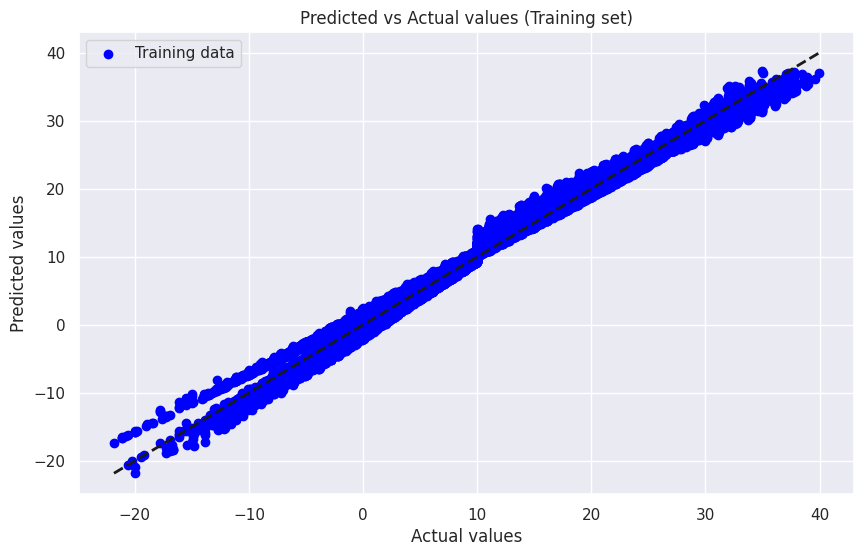

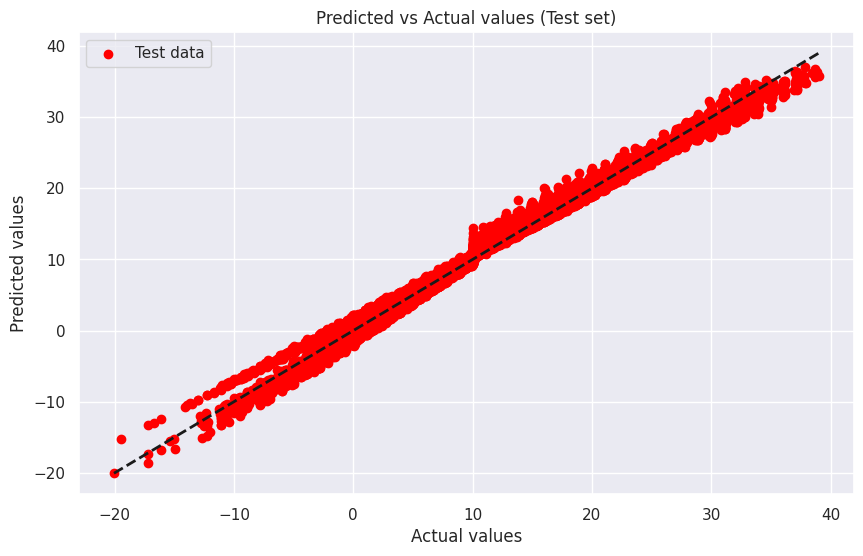

In [156]:
import matplotlib.pyplot as plt

# Predictions for training and test sets
y_train_pred = result.predict(sm.add_constant(X_train))
y_test_pred = result.predict(sm.add_constant(X_test))

# Plotting predictions vs actual values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--k', linewidth=2) # Adding the reference line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values (Training set)')
plt.legend()
plt.show()

# Plotting predictions vs actual values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2) # Adding the reference line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values (Test set)')
plt.legend()
plt.show()


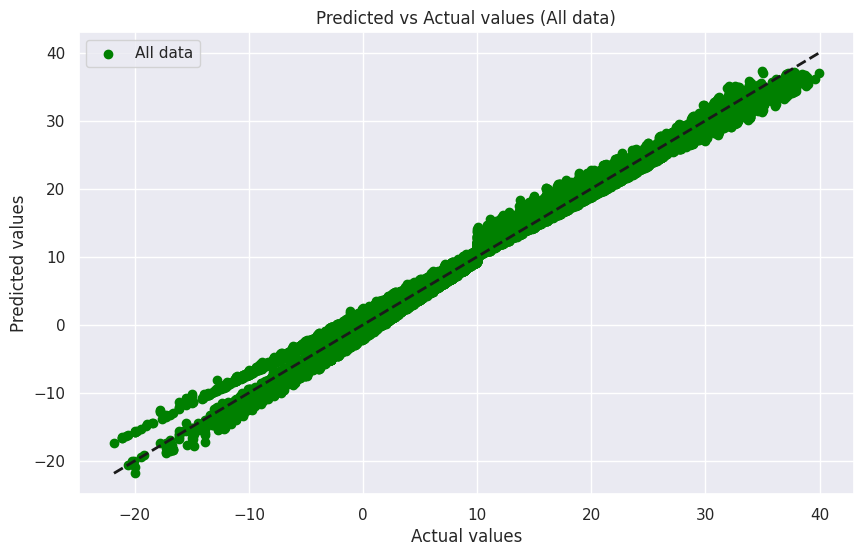

In [157]:
import matplotlib.pyplot as plt

# Predictions for all data points
y_pred = result.predict(sm.add_constant(X))

# Plotting predictions vs actual values for all data points
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='green', label='All data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', linewidth=2) # Adding the reference line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values (All data)')
plt.legend()
plt.show()
